# Pandas Basics
In python, the `pandas` package is the most popular data-frame (i.e., 2-dimensional) manipulation framework. You can think of it like `dplyr` for python. This notebook will walk you through some of the basics of working with dataframes, as well as plotting with `matplotlib` (a popular graphics package). 

## Creating DataFrames
Let's create a dataframe representing 1000 houses that has the following columns:
- `house_id`: This should be `"house_N"`, where `N` is the house number (i.e., `house_1`)
- `neighborhood`: There should be 5 neighborhoods, `"a"` through `"e"` (200 of each)
- `price_2010`: The price (in USD) of the house in 2010 (can be _float_)
- `price_2018`: The price (in USD) of the house in 2010 (can be _float_)

In [1]:
# Import the pandas, numpy, and matplotlib.pyplot packages (as pd, np, and plt respectively)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a _list_ of houses ("house_N") 1 through 1000
house_name = ["house_" + str(i) for i in range(1, 1001)]

In [3]:
# Create a list of neighborhoods `a` thorugh `e` that is 1000 elements long
neighborhoods = ['a', 'b', 'c', 'd', 'e'] * 200

In [4]:
# Create a list of 1000 home prices (for the year 2010) that range uniformly from 50000 to 400000 using np.random
price_2010 = np.random.uniform(high=400000, low=50000, size=1000)

In [5]:
# Create a list of 1000 home prices (for the year 2018) by multiplying the 2010 price by a random number
# The number should be drawn randomly from a normal distribution with mean 1.5 and standard deviation .5
price_2018 = np.random.normal(1.5, .5, 1000) * price_2010

In [6]:
# Create a dataframe `houses` with each list above as a column. Use the pd.DataFrame() function
houses = pd.DataFrame(data={
    "house":house_name,
    "neighborhood":neighborhoods,
    "price_2010":price_2010,
    "price_2018":price_2018
})

houses.head()

,house,neighborhood,price_2010,price_2018
0,house_1,a,170991.239842,106238.078684
1,house_2,b,395196.025538,582692.294032
2,house_3,c,59971.274749,95467.494409
3,house_4,d,297109.910852,484032.663551
4,house_5,e,342600.856173,473450.581606


# Accessing DataFrames
In this section, you'll extract and compute information of interest using dataframe **properties** and **methods**

In [7]:
# What is the _shape_ of the dataframe?
houses.shape

(1000, 4)

In [8]:
# What is the maximum house price in 2018?
houses.price_2018.max()

1006625.3333846977

In [9]:
# What are the summary statistics of the dataframe
houses.describe()

,price_2010,price_2018
count,1000.000000,1.000000e+03
mean,230148.822610,3.448074e+05
std,99934.185172,1.925522e+05
min,50147.274684,1.337414e+04
25%,147798.347131,1.923071e+05
50%,230305.858549,3.227343e+05
75%,317026.978867,4.695442e+05
max,399971.595727,1.006625e+06


In [10]:
# What was the median house price in 2018?
houses.price_2018.median()

322734.3128723698

In [11]:
# In which neighborhood was the cheapest house in 2010?
houses[houses.price_2010 == houses.price_2010.min()].neighborhood

984    e
Name: neighborhood, dtype: object

## Aggregating data
Just like `dplyr`, pandas has a `groupby` method in which you can _group_ a dataframe by a column of interest, and then _aggregate_ (`agg`) your columns using a given function (i.e., `mean`, `sum`, `median`, etc.). Note, this will create a row `index` (i.e., row name) for your dataframe

In [12]:
# What was the median home price _in each neighborhood_ in each year? 
# Create a new variable of these values.
by_neighborhood = houses.groupby('neighborhood').aggregate('median')
by_neighborhood

,price_2010,price_2018
neighborhood,,
a,231440.245063,321363.372718
b,225633.442266,327931.294513
c,227962.478891,332247.864153
d,230283.351185,326902.839620
e,236563.180104,302533.404035


In [13]:
# Get the prices for neighborhood 'b'. 
# Note, you can now use the df.loc[rows, columns] to select by row name
by_neighborhood.loc['b']

price_2010    225633.442266
price_2018    327931.294513
Name: b, dtype: float64

## Visualizing data
In this section, we'll use `matplotlib` to create a few plots. You may want to reference the [documentation](https://matplotlib.org/contents.html) or [examples](https://matplotlib.org/examples/)

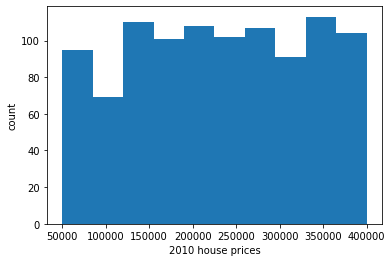

In [14]:
# Create a histogram of prices in 2010 using `plt.hist()`, then `plt.show()`
plt.hist(houses.price_2010)
plt.xlabel("2010 house prices")
plt.ylabel("count")
plt.show()

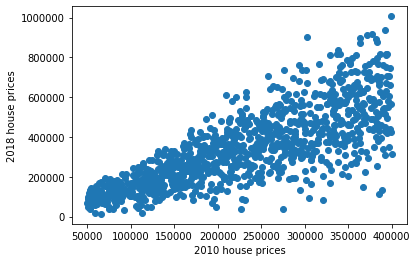

In [15]:
# Create a scatterplot of prices in 2010 v.s. prices in 2018 using `plt.scatter()`
plt.scatter(houses.price_2010, houses.price_2018)
plt.xlabel("2010 house prices")
plt.ylabel("2018 house prices")
plt.show()

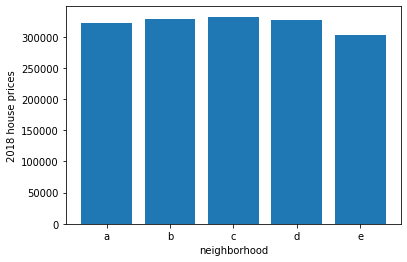

In [16]:
# To compare median house prices in 2018 by neighborhood, 
# Make a bar chart of the median house price in each neighborhood 

#by_neighborhood.index gives the neighborhood columns
plt.bar(by_neighborhood.index, by_neighborhood.price_2018)
plt.xlabel("neighborhood")
plt.ylabel("2018 house prices")
plt.show()

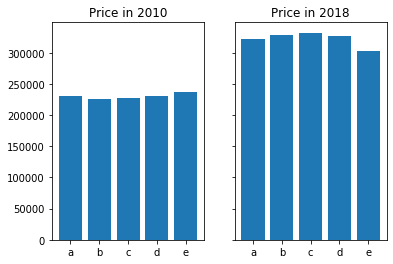

In [17]:
# Finally, let's create *two adjacent bar charts* of price by neighborhood (2010, 2018)
# Use the *same y axis*
# See: https://matplotlib.org/examples/pylab_examples/subplots_demo.html
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.bar(by_neighborhood.index, by_neighborhood.price_2010)
ax1.set_title('Price in 2010')

ax2.bar(by_neighborhood.index, by_neighborhood.price_2018)
ax2.set_title('Price in 2018')

plt.show()